<a href="https://colab.research.google.com/github/b15145456/Neural-Network-By-scratch/blob/master/%E9%A1%9E%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AFHW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random


#根據feature決定input layer 的 neural數目
class SOMNetwork:
    def __init__(self, net_size, times, learning_rate, input_data):
      #hyperparamater 1.epoches 2.資料
      self.data_label = np.unique(input_data[:, -1])
      self.input_data = input_data
      self.learning_rate = learning_rate
      self.epoches = times
      self.times = 1
      # 神經元數目=類別數目, 神經元維度=資料維度, 
      self.layer_name = "competition_Layer"
      self.neural_num =  net_size* net_size # for last column
      self.competition_weight = np.random.uniform(0, 1, [net_size, net_size, input_data.shape[1]] ).astype(np.float128)   #隨機產生 net_size x net_size的神經元, 神經元維度根據input設定
      
    def update_paramater(self, i, j, input):  #更新鄰近區域的神經元 目前設定3x3,
      self.competition_weight[i,j,] = self.competition_weight[i,j,] + self.learning_rate*(input - self.competition_weight[i,j,])
      if (i-1) >= 0:
        self.competition_weight[i-1,j,] = self.competition_weight[i-1,j,] + self.learning_rate*(input - self.competition_weight[i-1,j,])
      if (i-1) >= 0 and (j-1) >= 0:
        self.competition_weight[i-1,j-1,] = self.competition_weight[i-1,j-1,] + self.learning_rate*(input - self.competition_weight[i-1,j-1,])
      if (i-1) >= 0 and (j+1) < self.competition_weight.shape[1]:
        self.competition_weight[i-1,j+1,] = self.competition_weight[i-1,j+1,] + self.learning_rate*(input - self.competition_weight[i-1,j+1,])
      
      if (j-1) >= 0:
        self.competition_weight[i,j-1,] = self.competition_weight[i,j-1,] + self.learning_rate*(input - self.competition_weight[i,j-1,])
      if (j+1) < self.competition_weight.shape[1]:
        self.competition_weight[i,j+1,] = self.competition_weight[i,j+1,] + self.learning_rate*(input - self.competition_weight[i,j+1,])
      
      if (i+1) < self.competition_weight.shape[0] and (j-1) >= 0:
        self.competition_weight[i+1,j-1,] = self.competition_weight[i+1,j-1,] + self.learning_rate*(input - self.competition_weight[i+1,j-1,])
      if (i+1) < self.competition_weight.shape[0]:
        self.competition_weight[i+1,j,] = self.competition_weight[i+1,j,] + self.learning_rate*(input - self.competition_weight[i+1,j,])
      if (i+1) < self.competition_weight.shape[0] and (j+1) < self.competition_weight.shape[1]:
        self.competition_weight[i+1,j+1,] = self.competition_weight[i+1,j+1,] + self.learning_rate*(input - self.competition_weight[i+1,j+1,])      
      return None

    def choose_winner(self, data):
      min = 9999
      winner_index_i = 0
      winner_index_j = 0
      for i in range(self.competition_weight.shape[0]):
        for j in range(self.competition_weight.shape[1]):
          temp_dist = self.eucliDist(self.competition_weight[i,j,:], data)
          if temp_dist < min:
            min = temp_dist
            winner_index_i = i
            winner_index_j = j
      return winner_index_i, winner_index_j

    def random_input(self):
      data = self.input_data[random.randint(0,len(self.input_data)-1)]
      return data

    def eucliDist(self, A,B):
      return np.linalg.norm(A - B)

    def train(self):
        self.plot_topo()
        # for i in range(self.competition_weight.shape[0]):
        #   for j in range(self.competition_weight.shape[1]):
        #     plt.scatter(self.competition_weight[i][j][0],self.competition_weight[i][j][1])
        while self.epoches>0 :
          data = self.random_input()
          index_i, index_j = self.choose_winner(data)
          self.update_paramater(index_i, index_j, data)
          self.learning_rate = 0.9*(1-self.times/1000)
          self.epoches-=1
          self.times += 1
          if self.times%1000 == 0:
            print('訓練次數:',self.times)
            self.plot_topo()
            # for i in range(self.competition_weight.shape[0]):
            #   for j in range(self.competition_weight.shape[1]):
            #     plt.scatter(self.competition_weight[i][j][0],self.competition_weight[i][j][1], color='b')
          # self.ax = plt.subplot(projection='3d')  # 创建一个三维的绘图工程
          # for i in range(self.competition_weight.shape[0]):
          #   for j in range(self.competition_weight.shape[1]):
          #     try:
          #       self.ax.scatter(self.competition_weight[i][j][0],self.competition_weight[i][j][1],self.competition_weight[i][j][2], c='r')
          #     except:
          #       self.ax.scatter(self.competition_weight[i][j][0],self.competition_weight[i][j][1], c='r')

          # for i in range(self.competition_weight.shape[0]):
          #   for j in range(self.competition_weight.shape[1]):
          #     
          plt.show() 
    def plot_topo(self):
      x_values = []
      y_values = []
      for i in range(self.competition_weight.shape[0]):
        for j in range(self.competition_weight.shape[1]):
          plt.scatter(self.competition_weight[i][j][0],self.competition_weight[i][j][1], color='b')
          x_values.append(self.competition_weight[i][j][0])
          y_values.append(self.competition_weight[i][j][1])
          plt.plot(x_values, y_values, color='r')

      x_values = []
      y_values = []
      for j in range(self.competition_weight.shape[0]):
        for i in range(self.competition_weight.shape[1]):
          x_values.append(self.competition_weight[i][j][0])
          y_values.append(self.competition_weight[i][j][1])
          plt.plot(x_values, y_values, color='r')

          
       
      

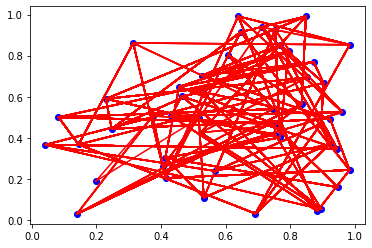

訓練次數: 1000


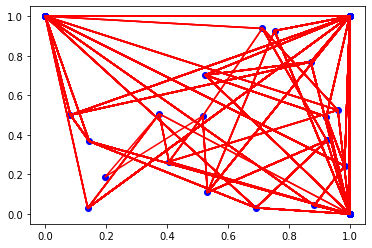

In [ ]:
import sklearn.model_selection
def load_train_test_data(train_ratio=.5):
    data = np.loadtxt("xor.txt",dtype=np.float,delimiter=' ')
    X = data[:,0:data.shape[1]-1]
    y = data[:,data.shape[1]-1]
    return sklearn.model_selection.train_test_split(X, y, test_size = 1 - train_ratio, random_state=0)
def scale_features(X_train, X_test, low=0, upp=1):
    minmax_scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(low, upp)).fit(np.vstack((X_train, X_test)))
    X_train_scaled = minmax_scaler.transform(X_train)
    X_test_scaled = minmax_scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

X_train, X_test, y_train, y_test = load_train_test_data(train_ratio=0.9)
X_train_scaled, X_test_scaled = scale_features(X_train, X_test, 0, 1)

# X_train_scaled = np.insert(X_train_scaled, 0, values=-1.0, axis=1)
# X_test_scaled = np.insert(X_train_scaled, 0, values=-1.0, axis=1)



distin_res = np.unique(y_train)

#feature_num, class_num, hiddenLayer_num, hiddenNeural_num, data_x, data_y, train_times, learning_rate = 0.1
# nn.hidden_layer_list


model = SOMNetwork(7, 1000, 1, X_train)


model.train()

In [ ]:
model.competition_weight

array([[[-0.48687886,  0.6478507 ],
        [-0.45349915,  0.5437295 ],
        [-0.37751127,  0.28715417],
        [-0.21004274,  0.04532025],
        [-0.08180873, -0.02934431],
        [ 0.40242506, -0.13596254],
        [ 0.96866986, -0.17341585]],

       [[-0.5937017 ,  0.65943035],
        [-0.56799781,  0.55266622],
        [-0.52446467,  0.27268907],
        [-0.31896047,  0.01667205],
        [-0.21429193, -0.07431586],
        [ 0.20193554, -0.19379857],
        [ 0.63597499, -0.2812916 ]],

       [[-0.90564494,  0.69502546],
        [-0.89199833,  0.57760305],
        [-0.76060213,  0.24024307],
        [-0.56945856, -0.03369061],
        [-0.46672443, -0.16202697],
        [-0.33096889, -0.38425545],
        [-0.2601899 , -0.51407661]],

       [[-1.07252427,  0.68611487],
        [-1.03681146,  0.58396878],
        [-0.95507988,  0.16728573],
        [-0.86599185, -0.08115766],
        [-0.80929152, -0.20551997],
        [-0.59896808, -0.4845906 ],
        [-0.49108146, 

In [ ]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


$$後面計算紙的部分$$

In [ ]:
import numpy as np

np.random.seed(42)
arr = np.random.randint(1, 10, size=(3, 4))
print(arr[0])
print(arr[1, 1]) # 3 located at (1, 1)
print(arr[2, -3]) # 4 located at (2, -3)

[7 4 8 5]
3
4


In [ ]:
a = np.random.rand(2, 2)
print(a)
a = np.insert(a, 0, -1.)    #在最前面插入-1
print(a)

[[0.57058196 0.155753  ]
 [0.9767602  0.71247579]]
[[-1.          0.57058196  0.155753  ]
 [-1.          0.9767602   0.71247579]]


In [ ]:
a = np.array([-1, 1, 1])
b = np.array([[-1, -2],
              [-3, -4],
              [-5, -6]])
len(a)
# print(a.shape)
# print(b.shape)
# c = np.dot(a, b)
# print(c)
# print(b[0,:])
# print(b[:,0])

3

In [ ]:
import numpy as np
array = np.array([[1,2,3],
                 [4,5,6]])
c = np.unique(array[:, -1])


In [ ]:
c

array([3, 6])

In [ ]:
len(c)

2

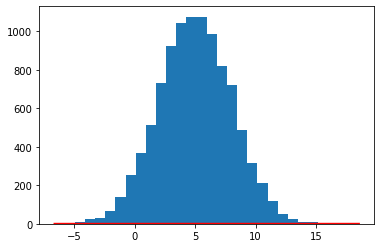

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
mu = 5  #期望為1
sigma = 3  #標準差為3
num = 10000  #個數為10000
rand_data = np.random.normal(mu, sigma, num)
count, bins, ignored = plt.hist(rand_data, 30)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2)), linewidth=2, color='r')
plt.show()

array([0.24423208, 0.57717911, 0.23070471])

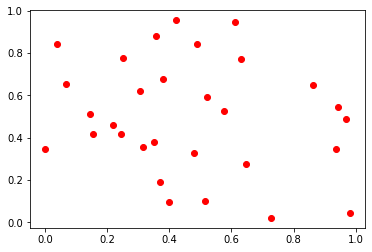

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
rand_data = np.random.uniform(0,1,[10,10,3])
for i in range(rand_data.shape[0]):
  plt.plot(rand_data[i,0], rand_data[i,1], 'ro')
# print(rand_data)
# print(rand_data[0,0,:])
rand_data[1,9,:]

In [ ]:
for i in range(rand_data.shape[0]):
  print(i)

0
1
2
3
4
5
6
7
8
9


NameError: ignored

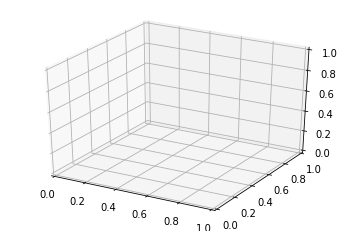

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
ax = plt.subplot(projection='3d')  # 创建一个三维的绘图工程
for i in range(rand_data.shape[0]):
  for j in range(rand_data.shape[1]):
    ax.scatter(rand_data[i,j,0], rand_data[i,j,1], rand_data[i,j,2], c='r')



In [ ]:
import numpy as np
def eucliDist(A,B):
    return np.sqrt(sum(np.power((A - B), 2)))

In [ ]:
cal_distance(np.array([1,2,1]), np.array([1,5,1]))

3.0

In [ ]:
for i in range(10):
  for j in range(10):
    print(i)
    print(j)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
# 解決中文亂碼問題
myfont = font_manager.FontProperties(fname=r"C:\Windows\Fonts\msyh.ttc"
, size=14)
N = 20
plt.close() # 關閉開啟的圖形視窗
def anni():
    fig = plt.figure()
    plt.ion() # 開啟互動式繪圖interactive
    for i in range(N):
        plt.cla()           # 清除原有影象
        plt.xlim(-0.2,20.4) # 設定x軸座標範圍
        plt.ylim(-1.2,1.2)  # 設定y軸座標範圍
        # 每當i增加的時候，增加自變數x的區間長度，可以理解為不斷疊加繪圖，所以每次迴圈之前都使用plt.cla()命令清除原有影象
        x = np.linspace(0,i+1,1000) 
        y = np.sin(x)
        plt.plot(x,y)
        plt.pause(0.1)
    # plt.ioff() #關閉互動式繪圖
    plt.show()

anni()

In [ ]:
import os
import glob

mypath = os.getcwd()
file_count = len(glob.glob1(mypath,"hypoDD.reloc.*"))
print("Number of clusters is:" ,file_count)

# Get .txt files

import fnmatch
import pandas as pd

data = pd.DataFrame()
for f_name in os.listdir(os.getcwd()):
 if fnmatch.fnmatch(f_name, 'hypoDD.reloc.*'):
     print(f_name)
     df=pd.read_csv(f_name,header=None,sep="\s+|\t")
     data=data.append(df,ignore_index=True)
     #print(data)


data.to_csv('IRIS.txt',index=False)
latitude=data.iloc[:,1]
longitude=data.iloc[:,2]
depth=data.iloc[:,3]

scatter_data = pd.concat([longitude, latitude,depth], axis=1)
scatter_data.columns=['lon','lat','depth']

#------------------------------3D scatter--------------------------------
#----setting default renderer------------
import plotly.io as pio
pio.rrenderers
pio.renderers.default = "browser"
#-----------------------------------------
import plotly.express as px

fig = px.scatter_3d(scatter_data,x='lon', y='lat', z='depth')
fig.show()
fig.write_image("fig1.jpg")

Number of clusters is: 0


IndexError: ignored

In [ ]:
i = 0
j = 0
for i in range(0,10):
  for j in range(0,10):
    i+=1
    j+=1

print(i)
print(j)

19
10


/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Casting input data from 'float128' to 'float64' for imshow
  fig.canvas.print_figure(bytes_io, **kw)


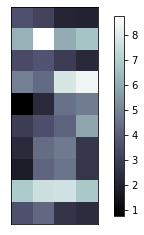

[[3.57908291 3.19982122 2.10865788 2.03606274]
 [6.19411939 8.76229841 6.07462871 6.69955212]
 [3.43573315 3.72402012 2.93064846 2.28573453]
 [4.89464894 4.34990891 7.8437318  8.39676138]
 [0.76420966 2.31824714 4.52896332 4.80977702]
 [2.96324243 3.56378204 4.15779306 5.8634917 ]
 [2.2967894  4.39117721 4.75056505 2.73999721]
 [1.84947833 4.181123   4.550546   2.71800704]
 [6.90416328 7.58899944 7.69407238 6.82102379]
 [3.62965393 4.2648238  2.64225343 2.36851741]]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# image data
a = np.array([0.313660827978, 0.365348418405, 0.423733120134,
              0.365348418405, 0.439599930621, 0.525083754405,
              0.423733120134, 0.525083754405, 0.651536351379]).reshape(3,3)

"""
for the value of "interpolation", check this:
http://matplotlib.org/examples/images_contours_and_fields/interpolation_methods.html
for the value of "origin"= ['upper', 'lower'], check this:
http://matplotlib.org/examples/pylab_examples/image_origin.html
"""
plt.imshow(model.competition_weight[0], interpolation='nearest', cmap='bone', origin='upper')
plt.colorbar(shrink=.92)

plt.xticks(())
plt.yticks(())
plt.show()

print(model.competition_weight[0])

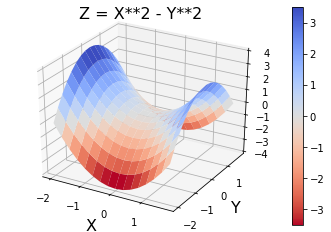

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
 
 
fig = plt.figure()
axis = fig.gca(projection='3d')
 
#產出X,Y,Z數據
x0 = np.arange(-2.0, 2.0, 0.25)
x1 = np.arange(-2.0, 2.0, 0.25)
X, Y = np.meshgrid(x0, x1)
Z = X**2 - Y**2
 
#畫圖
surface = axis.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='coolwarm_r')
fig.colorbar(surface, shrink=1.0, aspect=20)
 
# 設置圖表訊息
plt.title("Z = X**2 - Y**2", fontsize=16)
plt.xlabel("X", fontsize=16)
plt.ylabel("Y", fontsize=16)
 
plt.show()

In [ ]:
import networkx as nx
G = nx.Graph()

ModuleNotFoundError: ignored

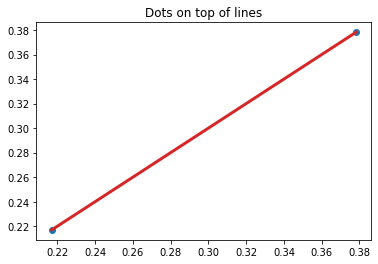

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility

x = np.random.random(20)
y = np.random.random(20)
for i in range(self.competition_weight.shape[0]):
  for j in range(self.competition_weight.shape[1]):
    plt.scatter(self.competition_weight[i][j][0],self.competition_weight[i][j][1])
  plt.show() 
# Scatter plot on top of lines
plt.plot(x, y, 'C3', zorder=1, lw=3)
plt.scatter(x, y, s=50, zorder=2)
plt.title('Dots on top of lines')
plt.show()

In [ ]:
# -*- coding: utf-8 -*-
# Unsupervised clustering for the UCI-WINE dataset using Kohonen network
# 參考網站 : https://visualstudiomagazine.com/articles/2019/01/01/self-organizing-maps-python.aspx
import numpy as np
import matplotlib.pyplot as plt

# 載入資料
def loadData():
    data_file = "wine.data"
    data_x = np.loadtxt(data_file, delimiter=",", usecols=range(1,14),
        dtype=np.float64)
    data_y = np.loadtxt(data_file, delimiter=",", usecols=[0],
        dtype=np.int)

    return data_x, data_y

# construct the SOM
def constructSOM(Rows, Cols, Dim, StepsMax, RangeMax, LearnMax, data_x):
    print("Constructing a 30x30 SOM from the wine data")
    map = np.random.random_sample(size=(Rows,Cols,Dim))

    # The call to random_sample() generates a 30 x 30 matrix where each cell is a vector of size 4 with random values between 0.0 and 1.0.
    for s in range(StepsMax):
        if s % (StepsMax/10) == 0: print("step = ", str(s))
        pct_left = 1.0 - ((s * 1.0) / StepsMax)
        curr_range = (int)(pct_left * RangeMax)
        curr_rate = pct_left * LearnMax

        # A random data item is selected and the best matching unit map node/cell is determined
        t = np.random.randint(len(data_x))
        (bmu_row, bmu_col) = closest_node(data_x, t, map, Rows, Cols)

        # The update moves the current node vector closer to the current data item using the curr_rate value which slowly decreases over time.
        for i in range(Rows):
            for j in range(Cols):
                if manhattan_dist(bmu_row, bmu_col, i, j) < curr_range:
                    map[i][j] = map[i][j] + curr_rate * (data_x[t] - map[i][j])
    
    return map

def manhattan_dist(r1, c1, r2, c2):
    return np.abs(r1-r2) + np.abs(c1-c2)
    
# Using a SOM for Dimensionality Reduction Visualization(DRV)
def DRV(Rows, Cols, data_x, data_y, map):
    print("Associating each data label to one map node ")
    mapping = np.empty(shape=(Rows, Cols), dtype=object)
    for i in range(Rows):
        for j in range(Cols):
            mapping[i][j] = [] # empty list

    for t in range(len(data_x)):
        (m_row, m_col) = closest_node(data_x, t, map, Rows, Cols)
        mapping[m_row][m_col].append(data_y[t])

    label_map = np.zeros(shape=(Rows,Cols), dtype=np.int)
    for i in range(Rows):
        for j in range(Cols):
            label_map[i][j] = most_common(mapping[i][j], 4)
    
    return label_map

def closest_node(data, t, map, m_rows, m_cols):
    # (row,col) of map node closest to data[t]
    result = (0,0)
    small_dist = 1.0e20
    for i in range(m_rows):
        for j in range(m_cols):
            ed = euc_dist(map[i][j], data[t])
            if ed < small_dist:
                small_dist = ed
                result = (i, j)
    return result

def euc_dist(v1, v2):
    return np.linalg.norm(v1 - v2) 

def most_common(lst, n):
    # lst is a list of values 0 . . n
    if len(lst) == 0: return -1
    counts = np.zeros(shape=n, dtype=np.int)
    for i in range(len(lst)):
        counts[lst[i]] += 1
    return np.argmax(counts)

# 畫圖
def Draw(label_map):
    plt.imshow(label_map, cmap=plt.cm.get_cmap('terrain_r', 13))
    plt.colorbar()
    plt.show()


Constructing a 30x30 SOM from the wine data
step =  0
step =  500
step =  1000
step =  1500
step =  2000
step =  2500
step =  3000
step =  3500
step =  4000
step =  4500
Associating each data label to one map node 


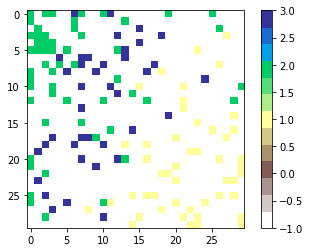

In [ ]:
np.random.seed(1)
Rows = 30; Cols = 30
Dim = 13
StepsMax = 5000
RangeMax = Rows + Cols
LearnMax = 0.5

# 載入資料
data_x, data_y = loadData()
# construct the SOM
map = constructSOM(Rows, Cols, Dim, StepsMax, RangeMax, LearnMax, data_x)
# Using a SOM for Dimensionality Reduction Visualization(DRV)
label_map = DRV(Rows, Cols, data_x, data_y, map)
# 畫圖
Draw(label_map)

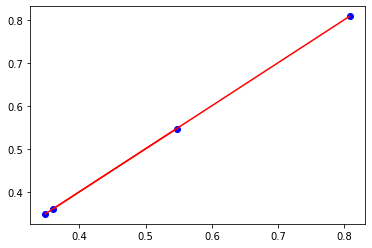

In [ ]:
import matplotlib.pyplot as plt

x = model.competition_weight[0,:2] # 要连接的两个点的坐标
y = model.competition_weight[0,:2] # 要连接的两个点的坐标

for i in range(len(x)):

    plt.plot(x[i], y[i], color='r')
    plt.scatter(x[i], y[i], color='b')

In [ ]:
# model.competition_weight[0,0]
model.competition_weight.shape

(3, 3, 2)

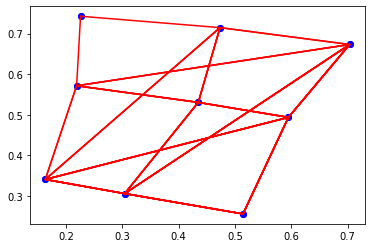

In [ ]:
# def plot_topo():
x_values = []
y_values = []
for i in range(model.competition_weight.shape[0]):
  for j in range(model.competition_weight.shape[1]):
    plt.scatter(model.competition_weight[i][j][0],model.competition_weight[i][j][1], color='b')
    x_values.append(model.competition_weight[i][j][0])
    y_values.append(model.competition_weight[i][j][1])
    plt.plot(x_values, y_values, color='r')


for j in range(model.competition_weight.shape[0]):
  for i in range(model.competition_weight.shape[1]):
    plt.scatter(model.competition_weight[i][j][0],model.competition_weight[i][j][1], color='b')
    x_values.append(model.competition_weight[i][j][0])
    y_values.append(model.competition_weight[i][j][1])
    plt.plot(x_values, y_values, color='r')

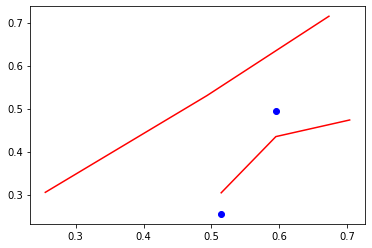

In [ ]:
model.competition_weight[0,0]
model.competition_weight[0,1]
plt.scatter(model.competition_weight[0][0][0],model.competition_weight[0][0][1], color='b')
plt.scatter(model.competition_weight[0][1][0],model.competition_weight[0][1][1], color='b')



In [ ]:
x_values

0.22592407771982452547

In [ ]:
model.competition_weight[0][0][0]

0.5144484655265585296

In [ ]:
model.competition_weight[0][0][1]

0.25513734129105527092

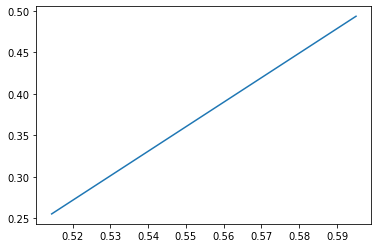

In [ ]:
a = np.random.uniform(0,10,5)
a.sort()
b = np.random.uniform(0,10,5)
b.sort()
c = np.zeros(shape=(5,5,2))

In [ ]:
for i in range(len(a)):
  for j in range(len(a)):
    c[i][j][0] = a[i]
    c[i][j][1] = b[i]



In [ ]:
c

array([[[2.06370056, 0.25406576],
        [2.06370056, 0.25406576],
        [2.06370056, 0.25406576],
        [2.06370056, 0.25406576],
        [2.06370056, 0.25406576]],

       [[6.31083147, 1.75695864],
        [6.31083147, 1.75695864],
        [6.31083147, 1.75695864],
        [6.31083147, 1.75695864],
        [6.31083147, 1.75695864]],

       [[7.78546957, 6.72849721],
        [7.78546957, 6.72849721],
        [7.78546957, 6.72849721],
        [7.78546957, 6.72849721],
        [7.78546957, 6.72849721]],

       [[8.5366139 , 7.49619897],
        [8.5366139 , 7.49619897],
        [8.5366139 , 7.49619897],
        [8.5366139 , 7.49619897],
        [8.5366139 , 7.49619897]],

       [[9.88909996, 8.36199458],
        [9.88909996, 8.36199458],
        [9.88909996, 8.36199458],
        [9.88909996, 8.36199458],
        [9.88909996, 8.36199458]]])

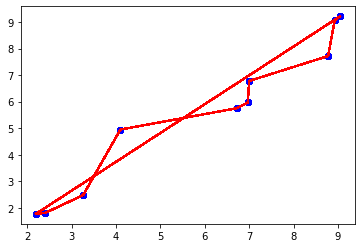

In [ ]:
x_values = []
y_values = []
for j in range(c.shape[0]):
  for i in range(c.shape[1]):
    plt.scatter(c[i][j][0],c[i][j][1], color='b')
    x_values.append(c[i][j][0])
    y_values.append(c[i][j][1])
    plt.plot(x_values, y_values, color='r')